In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle

In [2]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/rat-annie_5-12_session.pkl', 'rb') as inp:
    session512 = pickle.load(inp)

In [3]:
session512

In [4]:
rates = session512.data['rates']
angles = session512.data['angles']
coords = session512.data['coords']

In [5]:
print(len(coords))

4


In [6]:
len(rates[0])

2962

In [7]:
(angles[0].shape)[0]


2962

In [8]:
coords[0].shape


(2962, 17, 3)

In [9]:
session512.data.keys()

dict_keys(['bodyparts', 'angle_names', 'rates', 'coords', 'angles'])

In [39]:
session512.data["angle_names"]

['ankle', 'knee', 'hip', 'limbfoot', 'elbow', 'shoulder', 'forelimb']

In [10]:
session512.data['bodyparts']

['toe',
 'MTP',
 'ankle',
 'knee',
 'pelvis bottom',
 'hip',
 'pelvis top',
 'finger',
 'knuckle',
 'wrist',
 'elbow',
 'shoulder',
 'scapula',
 'x1',
 'x2',
 'y1',
 'y2']

In [11]:
new_rates = []
new_angles = []
new_coords = []
for i in range(len(rates)):
    size_we_want = int(rates[i].shape[0] / 2)
    temp_rate = rates[i][:size_we_want,:]
    new_rates.append(temp_rate)
    temp_angle = angles[i][:size_we_want,:]
    new_angles.append(temp_angle)
    temp_coord = coords[i][:size_we_want,:, :]
    new_coords.append(temp_coord)

In [12]:
session512.decode_angles?


Signature: session512.decode_angles(X=None, Y=None)
Docstring:
takes list of rates, angles, then using a wiener filter to decode. 
if no parameters are passed, uses data['rates'] and data['angles']

returns best_h, vaf (array of all angles and all folds), test_x (the
x test set that had best performance, and test_y (the y test set that
had best formance)
File:      /mnt/c/oobootoo/rat-fes/src/cort_processor.py
Type:      method


In [13]:
h, vaf, x_test, y_test = session512.decode_angles(X=new_rates, Y=new_angles)

In [14]:
h.shape

(321, 7)

In [15]:
vaf.shape

(7, 10)

In [16]:
vaf[0,:]

array([0.24308655, 0.17563321, 0.36653042, 0.22346944, 0.27693421,
       0.22145846, 0.14266346, 0.43770159, 0.40352149, 0.41760491])

In [17]:
np.average(vaf,axis=1)

array([0.29086037, 0.44053968, 0.12470967, 0.4076067 , 0.36558922,
       0.0036785 , 0.29925616])

In [18]:
plot_wiener_filter_predic?

Signature: plot_wiener_filter_predic(test_x, test_y, h)
Docstring: <no docstring>
File:      /mnt/c/oobootoo/rat-fes/src/plotter.py
Type:      function


In [19]:
x_test.shape

(708, 320)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
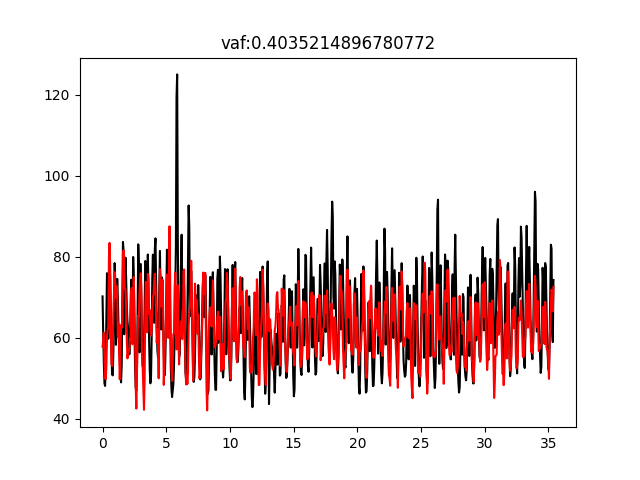

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
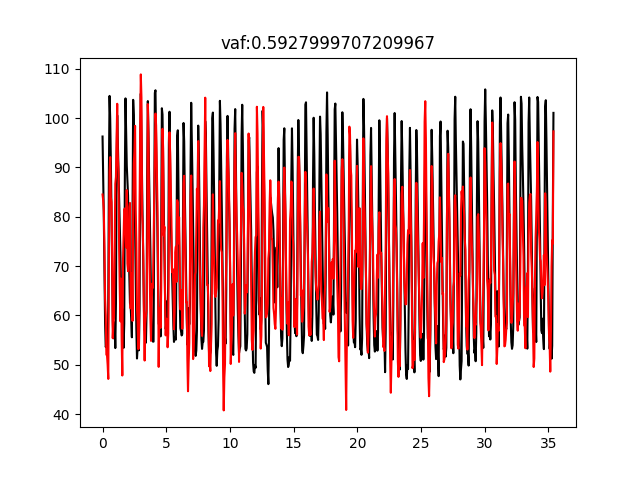

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
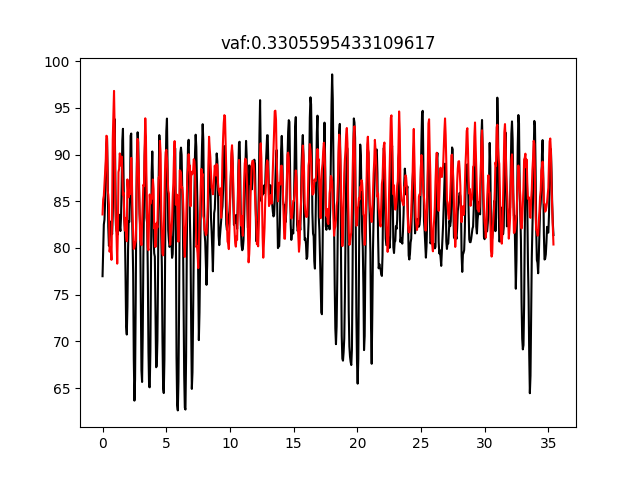

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
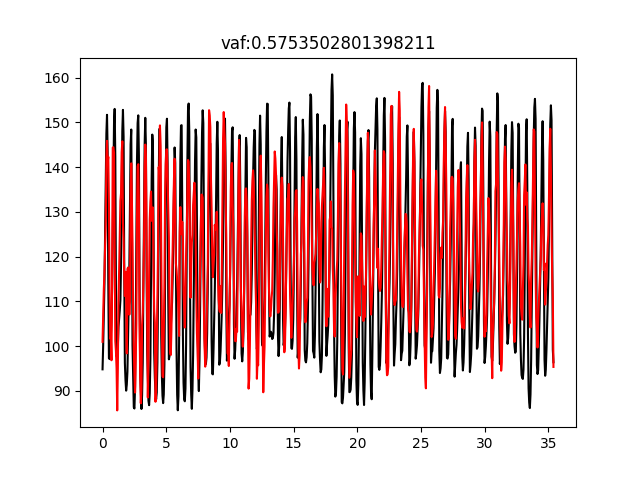

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
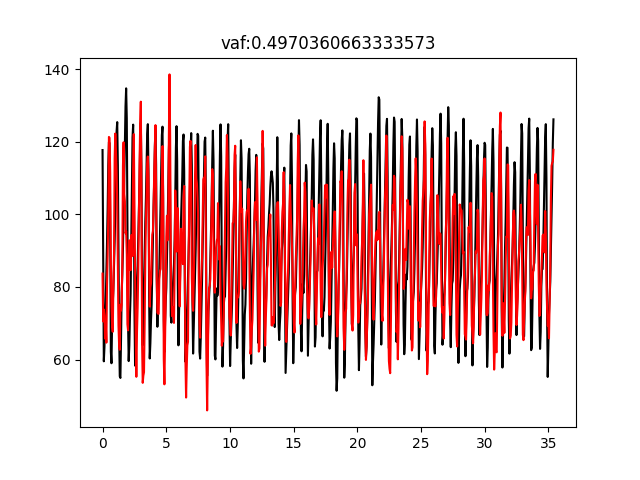

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
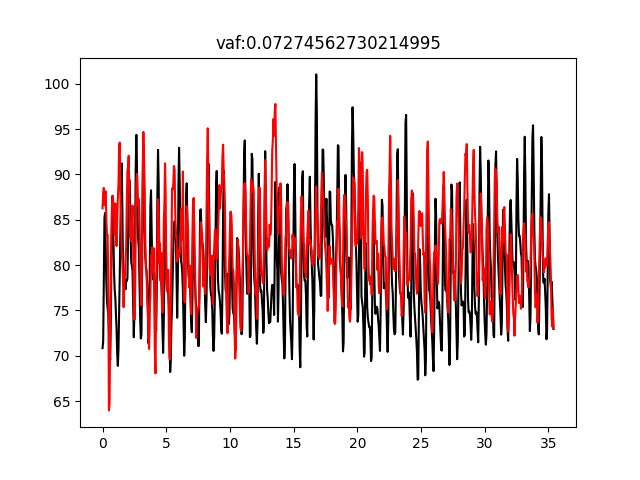

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
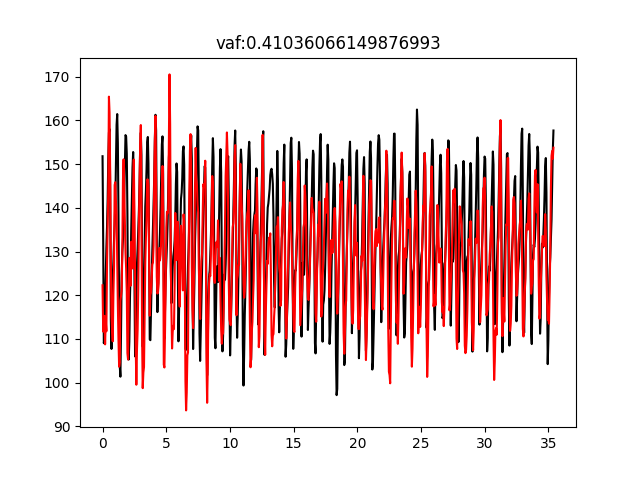

In [20]:
plot_wiener_filter_predic(x_test, y_test[:,0], h[:,0])
plot_wiener_filter_predic(x_test, y_test[:,1], h[:,1])
plot_wiener_filter_predic(x_test, y_test[:,2], h[:,2])
plot_wiener_filter_predic(x_test, y_test[:,3], h[:,3])
plot_wiener_filter_predic(x_test, y_test[:,4], h[:,4])
plot_wiener_filter_predic(x_test, y_test[:,5], h[:,5])
plot_wiener_filter_predic(x_test, y_test[:,6], h[:,6])

In [21]:
def stance_swing_dd(toe_height):
    # peaks = extract_peaks(toe_height, 12)
    peaks, nada = find_peaks(toe_height, prominence=10)
    peaks = np.append(peaks, np.size(toe_height))
    peaks = np.insert(peaks, 0, 0)
    ss_list = []

    for i in range(np.size(peaks)-1):
        end=peaks[i+1]
        start=peaks[i]

        gait = toe_height[start:end]
        dx = np.gradient(gait)
        ddx = np.gradient(dx)

        ddx_peaks, nada = find_peaks(ddx, 0.02)
        if np.size(ddx_peaks) == 2:
            ss = np.ones(np.size(gait), dtype=bool)
            ss[ddx_peaks[0]:ddx_peaks[1]] = 0
        else:
            minny = np.amin(gait)
            ss = gait>minny+2

        ss_list.append(ss)

    stance_swing = np.hstack(ss_list)
    return stance_swing

In [22]:
session512.process_toe_height()

array([20.28117469, 25.7413492 , 15.85535921, ...,  2.81373738,
        2.74498848,  2.00747169])

In [23]:
toe = session512.data['toe_height']

In [24]:
len(toe)

4

In [25]:
toeh = np.hstack(toe)

In [26]:
toeh.shape


(14250,)

In [27]:
ss = stance_swing_dd(toeh)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
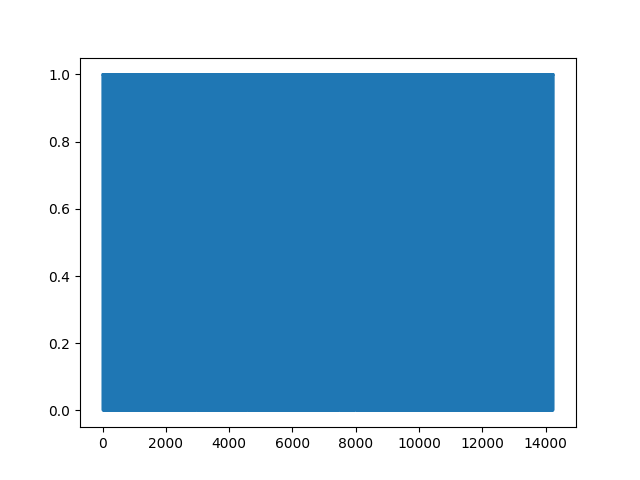

In [28]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
ax0.plot(ss)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
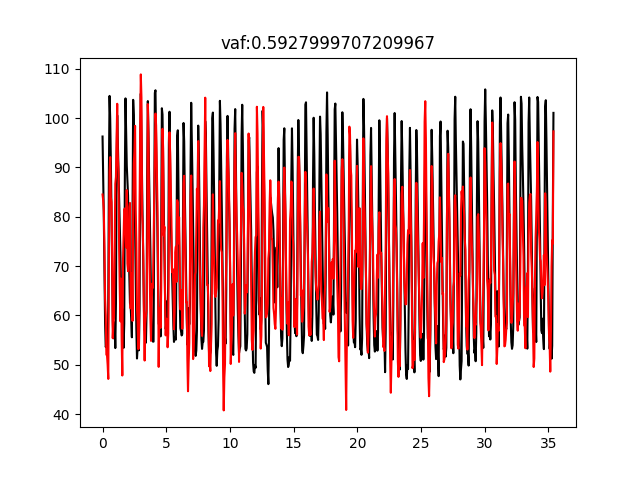

In [40]:
plot_wiener_filter_predic(x_test, y_test[:,1], h[:,1])


In [43]:
print(x_test.shape)
print(x_test)

(708, 320)
[[ 60.  20.  40. ...  60.  20.  60.]
 [ 20.  60.  40. ...  40.  40.  60.]
 [ 80. 200. 140. ... 280. 120. 300.]
 ...
 [  0.   0.   0. ...   0.  20.   0.]
 [  0.   0.   0. ...  40.  40.   0.]
 [  0.   0.   0. ...   0.  20.   0.]]


In [49]:
print(y_test[:,1].shape)
min_y1 = min(y_test[:,1])
max_y1 = max(y_test[:,1])
print(min_y1)
print(max_y1)
print(max_y1-min_y1)

(708,)
46.07080994140539
105.82564639820117
59.75483645679578


In [54]:
print(h[:,1].shape)
# print(h[:,1])

(321,)


In [52]:
def plot_wiener_filter_predic_malleable(test_x, test_y, h):
    predic_y = test_wiener_filter(test_x, h)
    vaffy = vaf(test_y, predic_y)
    
    samples = np.shape(test_y)[0]

    ts = np.linspace(0, (samples*50)/1000,
            samples)

    fig, ax = plt.subplots()
    ax.set_title(f'vaf:{vaffy}')
    ax.plot(ts, test_y, c='black')
    ax.plot(ts, predic_y, c='red')

In [53]:
def test_wiener_filter_malleable(x, H):
    """
    To get predictions from input data x with linear decoder
    x: input data
    H: parameter vector obtained by training
    """
    x_plus_bias = np.c_[np.ones((np.size(x, 0), 1)), x]
    y_pred = np.dot(x_plus_bias, H)
    return y_pred    

In [58]:
y1_pred = test_wiener_filter_malleable(x_test, h[:,1])
y1_actual = y_test[:,1]

In [57]:
print(y1_pred.shape)

(708,)
